<a href="https://colab.research.google.com/github/FGalvao77/Hands-on-with-PySpark/blob/main/00_A_Brief_Introduction_to_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A Brief Introduction to `PySpark`**
---
---

In [1]:
# import pandas as pd
# import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
# import pandas as pd

# df = pd.read_csv('https://query.data.world/s/tf57cjilrsdxd7robfvcbkjxmubwx5?dws=00000',
#                  sep=';'
# )

In [3]:
# df.to_csv('data.csv')

In [4]:
!curl https://raw.githubusercontent.com/selva86/datasets/master/bank-full.csv >> data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5698k  100 5698k    0     0  7517k      0 --:--:-- --:--:-- --:--:-- 7507k


In [6]:
%%capture
!pip install pyspark -U

In [7]:
import pyspark

In [8]:
print(f'[VERSION] PySpark: {pyspark.__version__}')

[VERSION] PySpark: 3.3.2


In [9]:
from pyspark.sql import SparkSession
# from pyspark.sql.functions import *

In [10]:
spark_session = SparkSession\
    .builder\
    .master('local[*]')\
    .appName(name='A Brief Introduction to PySpark | EDA & ML with PySpark')\
    .getOrCreate()

In [11]:
spark_session

In [5]:
!head data.csv

"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
56;"services";"married";"high.school";"no";"no";"yes";"telephone";"may";"mon";307;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
45;"services";"married";"basic.9y";"unknown";"no";"no";"telephone";"may";"mon";198;1;999;0;"nonex

In [12]:
df = spark_session.read.csv(path='data.csv', 
                            header=True,
                            inferSchema=True, 
                            sep=';')

In [13]:
type(df)

pyspark.sql.dataframe.DataFrame

In [14]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



In [15]:
df.head(n=10)

[Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=261, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no'),
 Row(age=57, job='services', marital='married', education='high.school', default='unknown', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=149, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no'),
 Row(age=37, job='services', marital='married', education='high.school', default='no', housing='yes', loan='no', contact='telephone', month='may', day_of_week='mon', duration=226, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euri

In [16]:
df.show(n=10, vertical=False)

+---+-----------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job|marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+-----------+-------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|  housemaid|married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57|   services|married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994| 

In [17]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('month', 'string'),
 ('day_of_week', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('emp.var.rate', 'double'),
 ('cons.price.idx', 'double'),
 ('cons.conf.idx', 'double'),
 ('euribor3m', 'double'),
 ('nr.employed', 'double'),
 ('y', 'string')]

In [18]:
df.count(), len(df.columns)

(41188, 21)

In [19]:
def dataframe_dim(df: object):
    num_rows = df.count()
    num_cols = len(df.columns)
    return (f'Rows: {num_rows} | Cols: {num_cols}')

In [20]:
dataframe_dim(df)

'Rows: 41188 | Cols: 21'

In [21]:
df

DataFrame[age: int, job: string, marital: string, education: string, default: string, housing: string, loan: string, contact: string, month: string, day_of_week: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, emp.var.rate: double, cons.price.idx: double, cons.conf.idx: double, euribor3m: double, nr.employed: double, y: string]

In [22]:
df.describe().show(vertical=False)

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+-----------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-----+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|          campaign|            pdays|           previous|poutcome|       emp.var.rate|    cons.price.idx|     cons.conf.idx|         euribor3m|      nr.employed|    y|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+-----------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-----+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|    41188|41188|      41188|             41188|

In [23]:
df.groupBy('job').count().sort('job').show()

+-------------+-----+
|          job|count|
+-------------+-----+
|       admin.|10422|
|  blue-collar| 9254|
| entrepreneur| 1456|
|    housemaid| 1060|
|   management| 2924|
|      retired| 1720|
|self-employed| 1421|
|     services| 3969|
|      student|  875|
|   technician| 6743|
|   unemployed| 1014|
|      unknown|  330|
+-------------+-----+



In [24]:
df.corr(col1='age', col2='duration')

-0.0008657050101409625

In [25]:
analysis = df.groupBy('job').count().sort('job').toPandas()

In [26]:
analysis

,job,count
0,admin.,10422
1,blue-collar,9254
2,entrepreneur,1456
3,housemaid,1060
4,management,2924
5,retired,1720
6,self-employed,1421
7,services,3969
8,student,875
9,technician,6743


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 10, 5

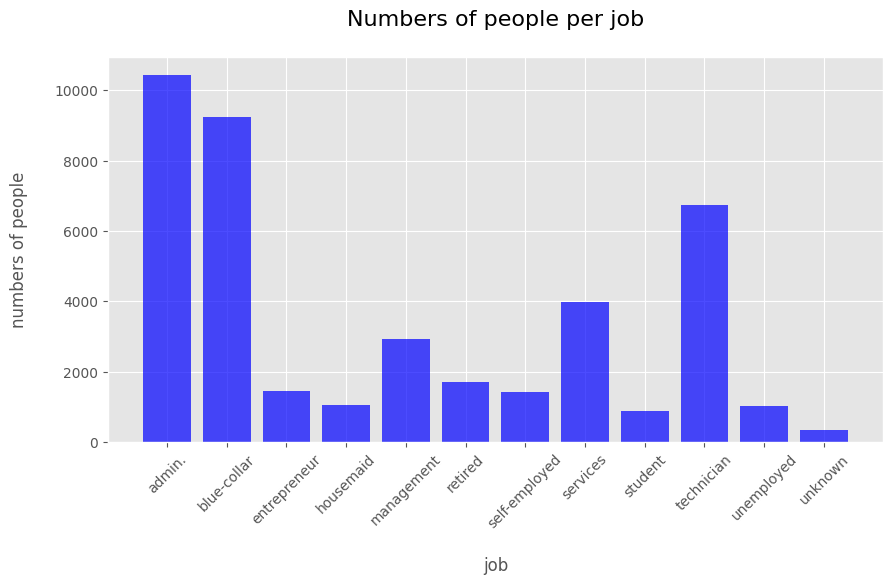

In [31]:
# plt.figure(figsize=(12, 5))

plt.bar(analysis['job'], analysis['count'], 
        color='blue', alpha=0.7)

plt.xlabel('\njob')
plt.ylabel('numbers of people\n')
plt.xticks(rotation=45)
plt.title('Numbers of people per job\n', size=16)
plt.show()

In [32]:
df.groupBy('poutcome').count().show()

+-----------+-----+
|   poutcome|count|
+-----------+-----+
|    success| 1373|
|    failure| 4252|
|nonexistent|35563|
+-----------+-----+



In [33]:
class_data = df.select('poutcome').toPandas()['poutcome']

In [34]:
class_data.tail(n=15)

41173        failure
41174        success
41175        failure
41176    nonexistent
41177    nonexistent
41178        success
41179    nonexistent
41180    nonexistent
41181    nonexistent
41182        success
41183    nonexistent
41184    nonexistent
41185    nonexistent
41186    nonexistent
41187        failure
Name: poutcome, dtype: object

In [35]:
from yellowbrick.target import ClassBalance

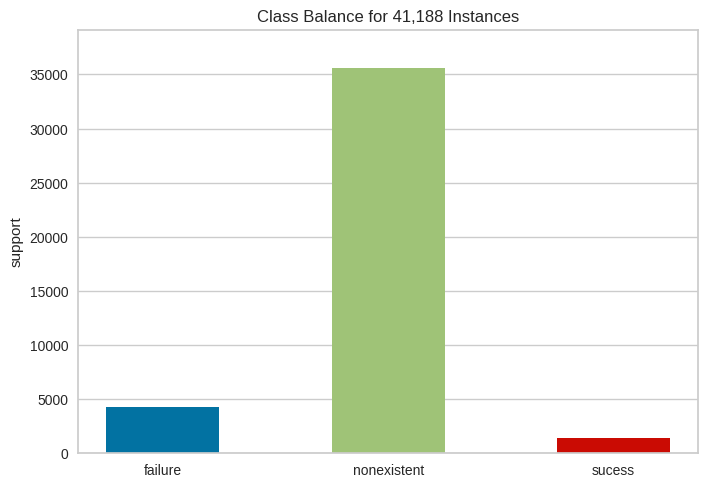

In [36]:
viz = ClassBalance(labels=['failure', 'nonexistent', 'sucess'])
viz.fit(class_data)
viz.show();

In [37]:
df =  df.filter('poutcome != "nonexistent"')

In [38]:
dataframe_dim(df)

'Rows: 5625 | Cols: 21'

In [39]:
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [40]:
df2 = df.select(
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome'
)

In [41]:
df2.show(n=20)

+---+-------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+--------+
|age|          job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|
+---+-------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+--------+
| 38|  blue-collar|  single|            unknown|     no|    yes|  no|telephone|  oct|        tue|      39|       1|  999|       1| failure|
| 40|     services| married|        high.school|     no|    yes|  no|telephone|  oct|        tue|     144|       1|  999|       1| failure|
| 36|       admin.| married|  university.degree|     no|    yes|  no|telephone|  nov|        wed|     449|       1|  999|       1| failure|
| 36|       admin.| married|        high.school|     no|    yes|  no|telephone|  nov|        wed|     114|       1|  999|       1| failure|
| 37|       admin.| 

In [42]:
from pyspark.ml.feature import StringIndexer

In [43]:
indexer = StringIndexer(
    inputCols=[
        'job', 'marital', 'education', 'default', 
        'housing', 'loan', 'contact', 'month', 
        'day_of_week', 
        'poutcome'
    ],
    outputCols=[
        'job_cat', 'marital_cat', 'education_cat', 'default_cat', 
        'housing_cat', 'loan_cat', 'contact_cat', 'month_cat', 
        'day_of_week_cat', 
        'poutcome_cat'
    ]
)

In [44]:
indexed = indexer.fit(df2).transform(df2)

In [45]:
indexed.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'job_cat',
 'marital_cat',
 'education_cat',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'contact_cat',
 'month_cat',
 'day_of_week_cat',
 'poutcome_cat']

In [46]:
df2 = indexed.select(
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'job_cat',
    'marital_cat',
    'education_cat',
    'default_cat',
    'housing_cat',
    'loan_cat',
    'contact_cat',
    'month_cat',
    'day_of_week_cat',
    'poutcome_cat'
)

In [47]:
df2.show()

+---+--------+--------+-----+--------+-------+-----------+-------------+-----------+-----------+--------+-----------+---------+---------------+------------+
|age|duration|campaign|pdays|previous|job_cat|marital_cat|education_cat|default_cat|housing_cat|loan_cat|contact_cat|month_cat|day_of_week_cat|poutcome_cat|
+---+--------+--------+-----+--------+-------+-----------+-------------+-----------+-----------+--------+-----------+---------+---------------+------------+
| 38|      39|       1|  999|       1|    1.0|        1.0|          5.0|        0.0|        0.0|     0.0|        1.0|      5.0|            3.0|         0.0|
| 40|     144|       1|  999|       1|    3.0|        0.0|          1.0|        0.0|        0.0|     0.0|        1.0|      5.0|            3.0|         0.0|
| 36|     449|       1|  999|       1|    0.0|        0.0|          0.0|        0.0|        0.0|     0.0|        1.0|      1.0|            4.0|         0.0|
| 36|     114|       1|  999|       1|    0.0|        0.0|

In [48]:
df2.dtypes

[('age', 'int'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('job_cat', 'double'),
 ('marital_cat', 'double'),
 ('education_cat', 'double'),
 ('default_cat', 'double'),
 ('housing_cat', 'double'),
 ('loan_cat', 'double'),
 ('contact_cat', 'double'),
 ('month_cat', 'double'),
 ('day_of_week_cat', 'double'),
 ('poutcome_cat', 'double')]

In [49]:
from pyspark.ml.feature import VectorAssembler

In [50]:
data_selection = VectorAssembler(
    inputCols=df2.drop('poutcome_cat').columns,
    outputCol='characteristic_variables'
)

In [51]:
out = data_selection.transform(df2)

In [52]:
out.show()

+---+--------+--------+-----+--------+-------+-----------+-------------+-----------+-----------+--------+-----------+---------+---------------+------------+------------------------+
|age|duration|campaign|pdays|previous|job_cat|marital_cat|education_cat|default_cat|housing_cat|loan_cat|contact_cat|month_cat|day_of_week_cat|poutcome_cat|characteristic_variables|
+---+--------+--------+-----+--------+-------+-----------+-------------+-----------+-----------+--------+-----------+---------+---------------+------------+------------------------+
| 38|      39|       1|  999|       1|    1.0|        1.0|          5.0|        0.0|        0.0|     0.0|        1.0|      5.0|            3.0|         0.0|    [38.0,39.0,1.0,99...|
| 40|     144|       1|  999|       1|    3.0|        0.0|          1.0|        0.0|        0.0|     0.0|        1.0|      5.0|            3.0|         0.0|    [40.0,144.0,1.0,9...|
| 36|     449|       1|  999|       1|    0.0|        0.0|          0.0|        0.0|      

In [53]:
input_data = out.select('characteristic_variables', 
                        'poutcome_cat')

In [54]:
input_data.head(n=5)

[Row(characteristic_variables=DenseVector([38.0, 39.0, 1.0, 999.0, 1.0, 1.0, 1.0, 5.0, 0.0, 0.0, 0.0, 1.0, 5.0, 3.0]), poutcome_cat=0.0),
 Row(characteristic_variables=DenseVector([40.0, 144.0, 1.0, 999.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 5.0, 3.0]), poutcome_cat=0.0),
 Row(characteristic_variables=SparseVector(14, {0: 36.0, 1: 449.0, 2: 1.0, 3: 999.0, 4: 1.0, 11: 1.0, 12: 1.0, 13: 4.0}), poutcome_cat=0.0),
 Row(characteristic_variables=DenseVector([36.0, 114.0, 1.0, 999.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 4.0]), poutcome_cat=0.0),
 Row(characteristic_variables=SparseVector(14, {0: 37.0, 1: 119.0, 2: 1.0, 3: 6.0, 4: 1.0, 11: 1.0, 12: 1.0, 13: 4.0}), poutcome_cat=1.0)]

In [55]:
input_data.show()

+------------------------+------------+
|characteristic_variables|poutcome_cat|
+------------------------+------------+
|    [38.0,39.0,1.0,99...|         0.0|
|    [40.0,144.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,11...|         0.0|
|    [36.0,114.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,11...|         1.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    [42.0,200.0,1.0,9...|         0.0|
|    [34.0,303.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    [51.0,324.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,10...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    [44.0,115.0,1.0,9...|         0.0|
|    [36.0,68.0,1.0,99...|         0.0|
|    [50.0,134.0,1.0,9...|         0.0|
|    [41.0,297.0,1.0,9...|         0.0|
|    [50.0,120.0,1.0,9...|         0.0|
|    [43.0,75.0,1.0,99...|         0.0|
|    [31.0,396.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,12...|         0.0|
+------------------------+------------+
only showing top 20 rows



In [57]:
(train_data, val_data) = input_data.randomSplit(
    weights=[0.75, 0.25], seed=1522
)

In [58]:
train_data.show()

+------------------------+------------+
|characteristic_variables|poutcome_cat|
+------------------------+------------+
|    (14,[0,1,2,3,4],[...|         0.0|
|    (14,[0,1,2,3,4],[...|         0.0|
|    (14,[0,1,2,3,4],[...|         0.0|
|    (14,[0,1,2,3,4],[...|         0.0|
|    (14,[0,1,2,3,4],[...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
+------------------------+------------+
only showing top 20 rows



In [59]:
val_data.show()

+------------------------+------------+
|characteristic_variables|poutcome_cat|
+------------------------+------------+
|    (14,[0,1,2,3,4,5]...|         0.0|
|    (14,[0,1,2,3,4,5]...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
+------------------------+------------+
only showing top 20 rows



In [60]:
from pyspark.ml.classification import (LogisticRegression, 
                                       DecisionTreeClassifier,
                                       RandomForestClassifier, 
                                       NaiveBayes)

In [61]:
mdl_logReg = LogisticRegression(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

mdl_decTree = DecisionTreeClassifier(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

mdl_randFor = RandomForestClassifier(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

mdl_nBayes = NaiveBayes(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

In [62]:
mdl_training_logReg = mdl_logReg.fit(train_data)
mdl_training_decTree = mdl_decTree.fit(train_data)
mdl_training_randFor = mdl_randFor.fit(train_data)
mdl_training_nBayes = mdl_nBayes.fit(train_data)

In [63]:
pred_logReg = mdl_training_logReg.transform(val_data)
pred_decTree = mdl_training_decTree.transform(val_data)
pred_randFor = mdl_training_randFor.transform(val_data)
pred_nBayes = mdl_training_nBayes.transform(val_data)

In [64]:
pred_logReg.show(n=50)

+------------------------+------------+--------------------+--------------------+----------+
|characteristic_variables|poutcome_cat|       rawPrediction|         probability|prediction|
+------------------------+------------+--------------------+--------------------+----------+
|    (14,[0,1,2,3,4,5]...|         0.0|[324.532436452801...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5]...|         0.0|[324.433881817242...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[324.436516716188...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[324.214575754290...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[324.660534324742...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[324.183524293602...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[324.197134997844...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[324.164576965886...|          

In [65]:
pred_decTree.show(n=50)

+------------------------+------------+-------------+--------------------+----------+
|characteristic_variables|poutcome_cat|rawPrediction|         probability|prediction|
+------------------------+------------+-------------+--------------------+----------+
|    (14,[0,1,2,3,4,5]...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5]...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3110.0,0.0]| 

In [66]:
pred_randFor.show(n=50)

+------------------------+------------+--------------------+--------------------+----------+
|characteristic_variables|poutcome_cat|       rawPrediction|         probability|prediction|
+------------------------+------------+--------------------+--------------------+----------+
|    (14,[0,1,2,3,4,5]...|         0.0|[19.5845380437008...|[0.97922690218504...|       0.0|
|    (14,[0,1,2,3,4,5]...|         0.0|[19.6454056384762...|[0.98227028192381...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.5395359450492...|[0.97697679725246...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.6961275778591...|[0.98480637889295...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.7174128717492...|[0.98587064358746...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.6289676837023...|[0.98144838418511...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.7174128717492...|[0.98587064358746...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.5219909395163...|[0.9760995

In [67]:
pred_nBayes.show(n=50)

+------------------------+------------+--------------------+--------------------+----------+
|characteristic_variables|poutcome_cat|       rawPrediction|         probability|prediction|
+------------------------+------------+--------------------+--------------------+----------+
|    (14,[0,1,2,3,4,5]...|         0.0|[-724.63990882303...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5]...|         0.0|[-877.30999943284...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-456.20113748266...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-507.56613865508...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-1999.4043152547...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-553.95976152078...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-775.08739332059...|           [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-561.48689167813...|          

In [68]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [69]:
eval = MulticlassClassificationEvaluator(
    predictionCol='prediction',
    labelCol='poutcome_cat',
    metricName='accuracy'
)

In [70]:
acc_logReg = eval.evaluate(dataset=pred_logReg)
acc_decTree = eval.evaluate(dataset=pred_decTree)
acc_randFor = eval.evaluate(dataset=pred_randFor)
acc_nBayes = eval.evaluate(dataset=pred_nBayes)

In [71]:
print('\t[ACCURACY]')
print('=' * 30)
print(f'Logistic Regression: {(acc_logReg * 100):.4f}%')
print(f'Decision Tree      : {(acc_decTree * 100):.4f}%')
print(f'Random Forest      : {(acc_randFor * 100):.4f}%')
print(f'Naive Bayes        : {(acc_nBayes * 100):.4f}%')

	[ACCURACY]
Logistic Regression: 97.6845%
Decision Tree      : 98.0463%
Random Forest      : 97.8292%
Naive Bayes        : 97.3227%


In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
df_pred_logReg = pred_logReg.select(
    'prediction', 'poutcome_cat'
).toPandas()

df_pred_decTree = pred_decTree.select(
    'prediction', 'poutcome_cat'
).toPandas()

df_pred_randFor = pred_randFor.select(
    'prediction', 'poutcome_cat'
).toPandas()

df_pred_nBayes = pred_nBayes.select(
    'prediction', 'poutcome_cat'
).toPandas()

In [74]:
conf_mat_logReg = confusion_matrix(
    y_true=df_pred_logReg['poutcome_cat'],
    y_pred=df_pred_logReg['prediction']
)

conf_mat_logReg

array([[1013,   23],
       [   9,  337]])

In [75]:
conf_mat_decTree = confusion_matrix(
    y_true=df_pred_decTree['poutcome_cat'],
    y_pred=df_pred_decTree['prediction']
)

conf_mat_decTree

array([[1023,   13],
       [  14,  332]])

In [76]:
conf_mat_randFor = confusion_matrix(
    y_true=df_pred_randFor['poutcome_cat'],
    y_pred=df_pred_randFor['prediction']
)

conf_mat_randFor

array([[1011,   25],
       [   5,  341]])

In [77]:
conf_mat_nBayes = confusion_matrix(
    y_true=df_pred_nBayes['poutcome_cat'],
    y_pred=df_pred_nBayes['prediction']
)

conf_mat_nBayes

array([[1000,   36],
       [   1,  345]])